# **UNEMPLOYMENT ANALYSIS IN PYTHON**

In [159]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [160]:
# Load datasets
data1 = pd.read_csv('Unemployment in India.csv')
data2 = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')

In [161]:
# Inspect the first few rows of both datasets
print("Data 1 Preview:")
print(data1.head())
print("\nData 2 Preview:")
print(data2.head())

Data 1 Preview:
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  

Data 2 Preview:
           Region         Date  Frequency   Esti

# Data Cleaning and Preprocessing

## Clean column names 

In [197]:
# Clean column names by stripping extra spaces
data1.columns = data1.columns.str.strip()
data2.columns = data2.columns.str.strip()

## Check for missing values

In [211]:
def check_missing_values(df, name):
    print(f"Missing values in {name}:")
    print(df.isnull().sum())

check_missing_values(data1, 'Dataset 1')
check_missing_values(data2, 'Dataset 2')

Missing values in Dataset 1:
Region                                     28
Date                                       28
Frequency                                  28
Estimated Unemployment Rate (%)             0
Estimated Employed                          0
Estimated Labour Participation Rate (%)     0
Area                                       28
dtype: int64
Missing values in Dataset 2:
Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Region.1                                   0
longitude                                  0
latitude                                   0
7-Day Moving Average                       6
dtype: int64


## Fill missing values or drop them based on analysis

In [163]:
# Fill missing values for numeric columns only
data1_numeric_columns = data1.select_dtypes(include=[np.number]).columns
data2_numeric_columns = data2.select_dtypes(include=[np.number]).columns

In [164]:
# Fill missing numeric values with the mean for each dataset
data1[data1_numeric_columns] = data1[data1_numeric_columns].fillna(data1[data1_numeric_columns].mean())
data2[data2_numeric_columns] = data2[data2_numeric_columns].fillna(data2[data2_numeric_columns].mean())

In [183]:
# Convert the 'Date' column to datetime format with dayfirst=True
# Check if 'Date' column exists in both datasets, otherwise adjust the column name accordingly
if 'Date' in data1.columns:
    data1['Date'] = pd.to_datetime(data1['Date'], errors='coerce', dayfirst=True)
else:
    print("Date column not found in Data 1, checking alternative column names.")
    # Check for potential date column names in Data 1 
    print(data1.columns)

if 'Date' in data2.columns:
    data2['Date'] = pd.to_datetime(data2['Date'], errors='coerce', dayfirst=True)
else:
    print("Date column not found in Data 2, checking alternative column names.")
    # Check for potential date column names in Data 2
    print(data2.columns)

Date column not found in Data 1, checking alternative column names.
Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


# Data Exploration

## Descriptive statistics

In [167]:
print("\nDescriptive statistics for Data 1:")
print(data1.describe())

print("\nDescriptive statistics for Data 2:")
print(data2.describe())


Descriptive statistics for Data 1:
       Estimated Unemployment Rate (%)  Estimated Employed  \
count                       768.000000        7.680000e+02   
mean                         11.787946        7.204460e+06   
std                          10.523784        7.938986e+06   
min                           0.000000        4.942000e+04   
25%                           4.720000        1.376532e+06   
50%                           9.005000        5.064048e+06   
75%                          15.472500        1.111390e+07   
max                          76.740000        4.577751e+07   

       Estimated Labour Participation Rate (%)  
count                               768.000000  
mean                                 42.630122  
std                                   7.961667  
min                                  13.330000  
25%                                  38.265000  
50%                                  41.430000  
75%                                  45.362500  
max          

In [187]:
# Inspect column names to confirm the presence of the 'Date' column
print("Data 1 Columns:", data1.columns)
print("Data 2 Columns:", data2.columns)

Data 1 Columns: Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')
Data 2 Columns: Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude', '7-Day Moving Average'],
      dtype='object')


In [212]:
# Ensure both 'Date' columns are in datetime format, with dayfirst=True for both
data1['Date'] = pd.to_datetime(data1['Date'], errors='coerce', dayfirst=True)
data2['Date'] = pd.to_datetime(data2['Date'], errors='coerce', dayfirst=True)

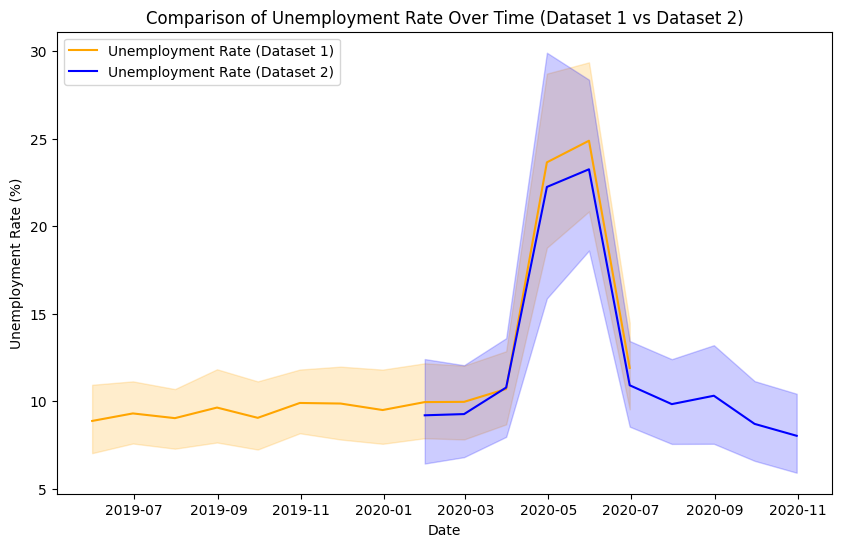

In [213]:
# Plot the data
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=data1, label='Unemployment Rate (Dataset 1)', color='orange')
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=data2, label='Unemployment Rate (Dataset 2)', color='blue')
plt.title('Comparison of Unemployment Rate Over Time (Dataset 1 vs Dataset 2)')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.show()

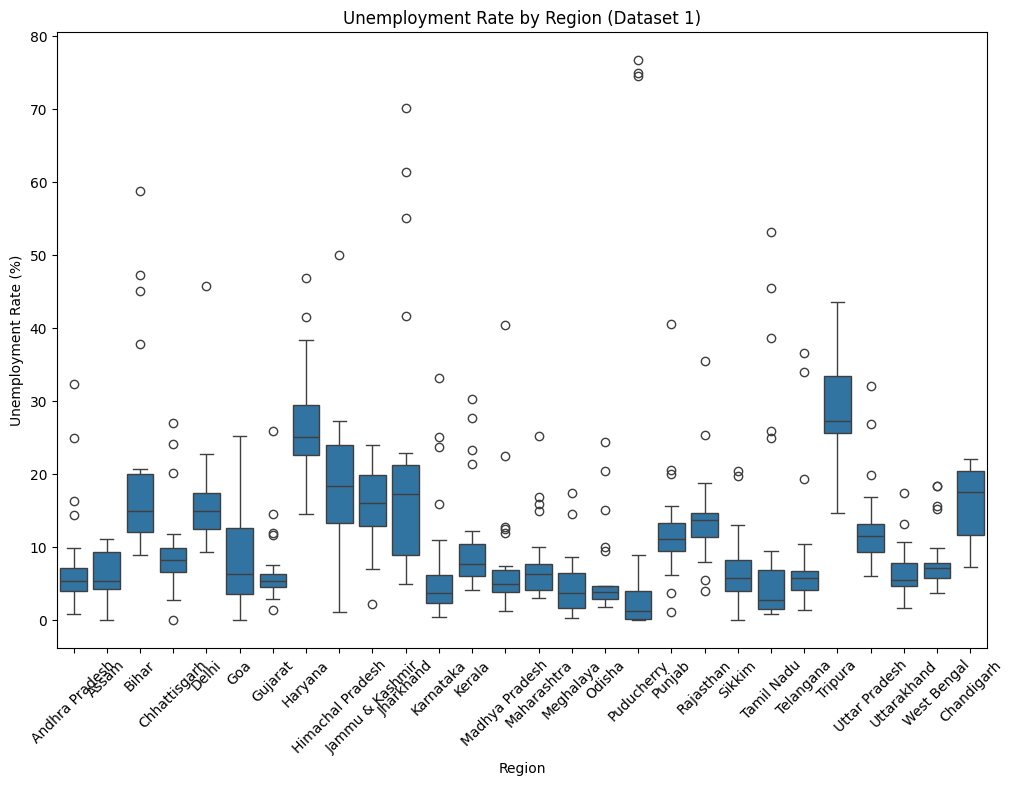

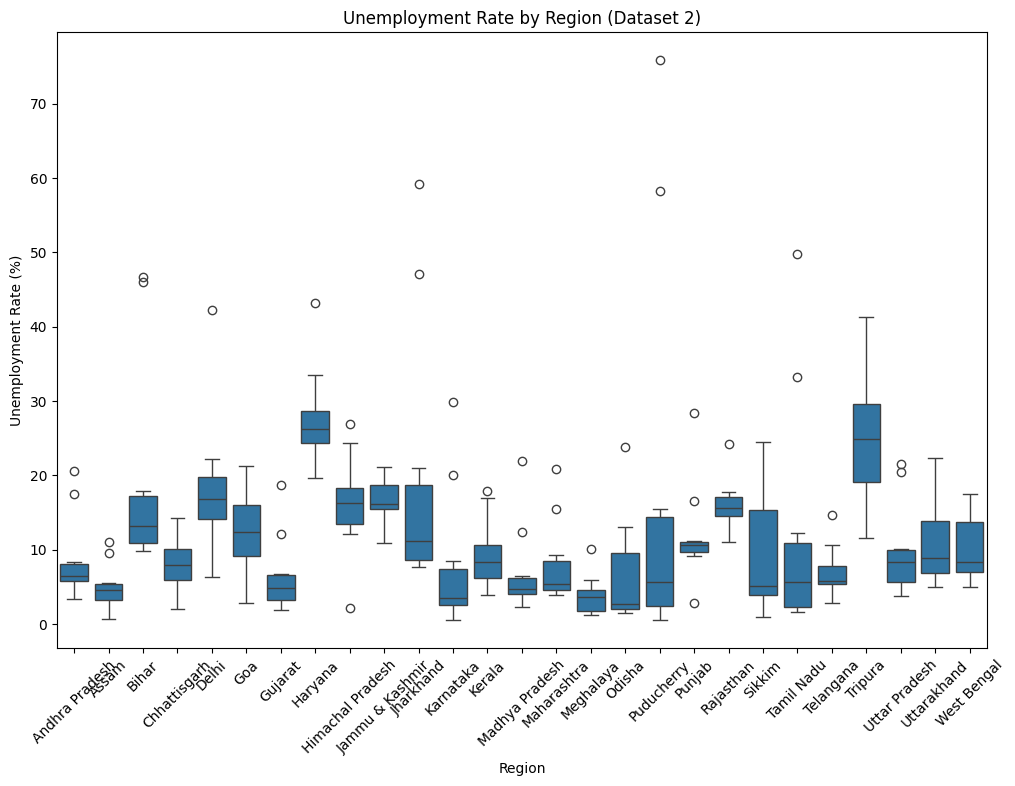

In [214]:
# Compare unemployment rates across regions for both datasets
if 'Region' in data1.columns:
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='Region', y='Estimated Unemployment Rate (%)', data=data1)
    plt.title('Unemployment Rate by Region (Dataset 1)')
    plt.xticks(rotation=45)
    plt.ylabel('Unemployment Rate (%)')
    plt.show()
    
if 'Region' in data2.columns:
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='Region', y='Estimated Unemployment Rate (%)', data=data2)
    plt.title('Unemployment Rate by Region (Dataset 2)')
    plt.xticks(rotation=45)
    plt.ylabel('Unemployment Rate (%)')
    plt.show()

# Advanced Statistical Analysis

## Correlation Matrix

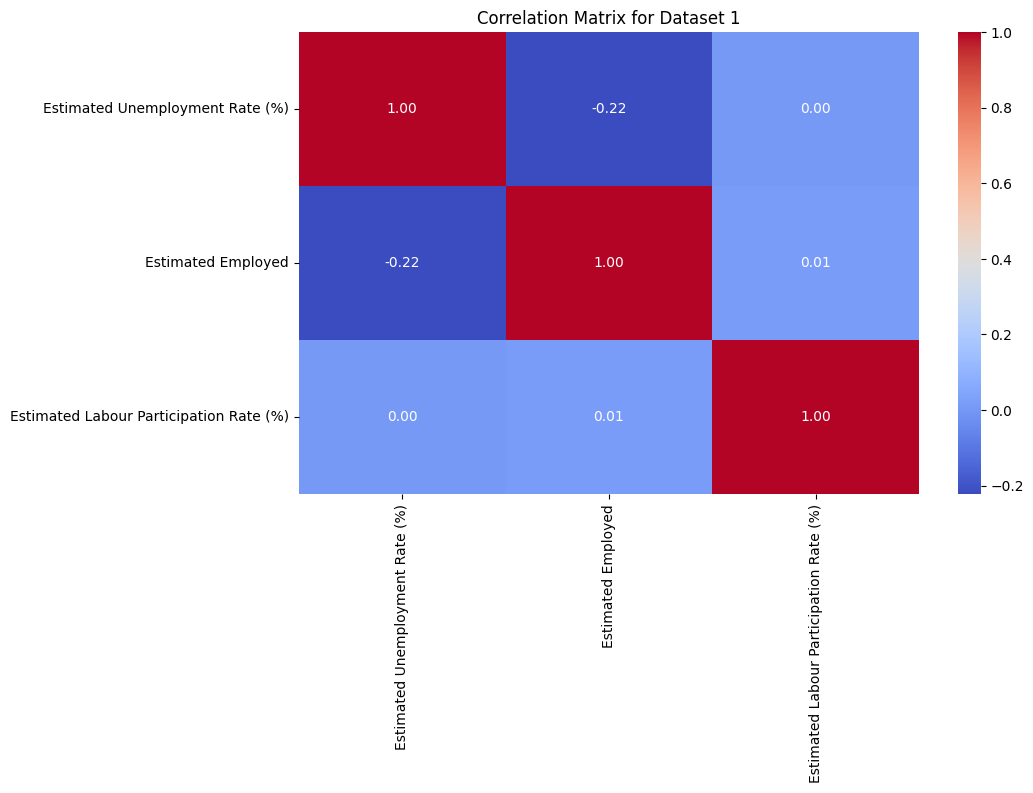

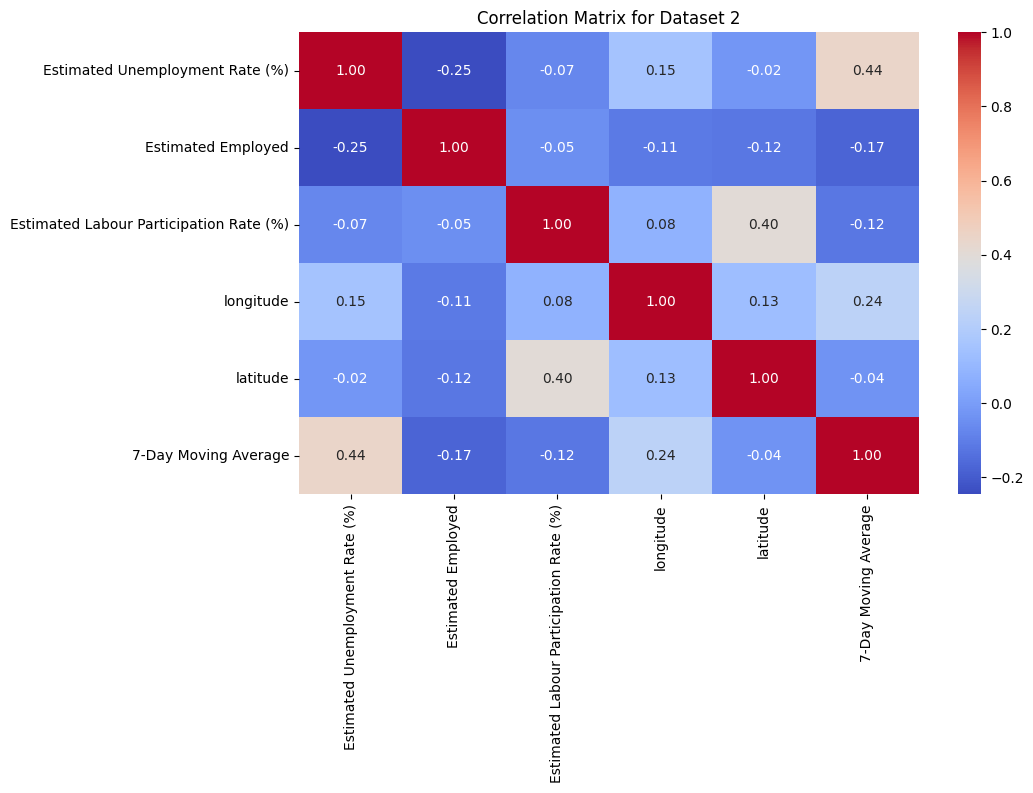

In [215]:
# Select only numeric columns for correlation in both data1 and data2
numeric_columns_data2 = data2.select_dtypes(include=['float64', 'int64']).columns
numeric_columns_data1 = data1.select_dtypes(include=['float64', 'int64']).columns

# Plot correlation matrix for dataset1
plt.figure(figsize=(10, 6))
sns.heatmap(data1[numeric_columns_data1].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Dataset 1')
plt.show()

# Plot correlation matrix for dataset2 if there are numeric columns
if len(numeric_columns_data1) > 0:
    plt.figure(figsize=(10, 6))
    sns.heatmap(data2[numeric_columns_data2].corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix for Dataset 2')
    plt.show()

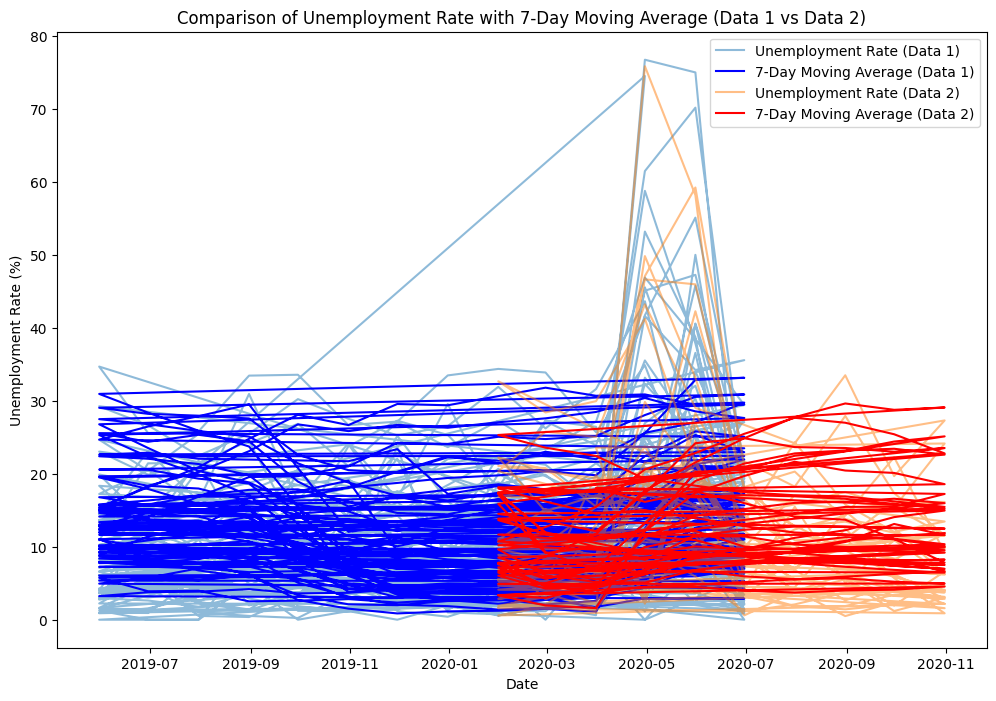

In [216]:
# Fill missing values using forward fill for both datasets
data1['Estimated Unemployment Rate (%)'] = data1['Estimated Unemployment Rate (%)'].ffill()
data2['Estimated Unemployment Rate (%)'] = data2['Estimated Unemployment Rate (%)'].ffill()

# Calculate the 7-day moving average for the unemployment rate for both datasets
data1['7-Day Moving Average'] = data1['Estimated Unemployment Rate (%)'].rolling(window=7).mean()
data2['7-Day Moving Average'] = data2['Estimated Unemployment Rate (%)'].rolling(window=7).mean()

# Plot the original unemployment rate and its moving average for both datasets
plt.figure(figsize=(12, 8))

# Data 1 plot
plt.plot(data1['Date'], data1['Estimated Unemployment Rate (%)'], label='Unemployment Rate (Data 1)', alpha=0.5)
plt.plot(data1['Date'], data1['7-Day Moving Average'], label='7-Day Moving Average (Data 1)', color='blue')

# Data 2 plot
plt.plot(data2['Date'], data2['Estimated Unemployment Rate (%)'], label='Unemployment Rate (Data 2)', alpha=0.5)
plt.plot(data2['Date'], data2['7-Day Moving Average'], label='7-Day Moving Average (Data 2)', color='red')

# Title and labels
plt.title('Comparison of Unemployment Rate with 7-Day Moving Average (Data 1 vs Data 2)')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.show()

In [210]:
# Conclusion: Insights and Next Steps
print("Key Insights:")
print("1. Trends and patterns over time are highlighted using line plots, showing the overall increase in unemployment rates during key periods.")
print("2. Regional differences are visualized with boxplots, revealing significant variability in unemployment rates across different regions (if region data is available).")
print("3. Correlation analysis indicates relationships between unemployment rates, employment levels, and labor participation rates, which can guide policy decisions.")

print("\nNext Steps:")
print("1. Investigate the impact of external events (like the Covid-19 pandemic) on the unemployment rate.")
print("2. Explore the regional data further to identify specific areas with the highest unemployment spikes.")
print("3. Conduct more detailed time series analysis, considering factors like seasonality or economic cycles.")

Key Insights:
1. Trends and patterns over time are highlighted using line plots, showing the overall increase in unemployment rates during key periods.
2. Regional differences are visualized with boxplots, revealing significant variability in unemployment rates across different regions (if region data is available).
3. Correlation analysis indicates relationships between unemployment rates, employment levels, and labor participation rates, which can guide policy decisions.

Next Steps:
1. Investigate the impact of external events (like the Covid-19 pandemic) on the unemployment rate.
2. Explore the regional data further to identify specific areas with the highest unemployment spikes.
3. Conduct more detailed time series analysis, considering factors like seasonality or economic cycles.
